# Import Required Libraries
Import necessary libraries for data analysis, including pandas, matplotlib, os, and datetime.

In [1]:
# Import necessary libraries for data analysis
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import os  # For file and directory operations
from datetime import datetime  # For handling date and time data

# Load Multiple Excel Files
Create functions to locate and load multiple Excel files from a directory.

In [2]:
# Function to locate all Excel files in a given directory
def locate_excel_files(directory):
    """
    Locate all Excel files in the specified directory.

    Args:
        directory (str): Path to the directory containing Excel files.

    Returns:
        list: List of file paths for all Excel files in the directory.
    """
    excel_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.xlsx') or file.endswith('.xls')]
    return excel_files

# Function to load Excel files into a dictionary of DataFrames
def load_excel_files(file_paths):
    """
    Load multiple Excel files into a dictionary of pandas DataFrames.

    Args:
        file_paths (list): List of file paths to Excel files.

    Returns:
        dict: Dictionary where keys are file names and values are DataFrames.
    """
    data_frames = {}
    for file_path in file_paths:
        file_name = os.path.basename(file_path)
        data_frames[file_name] = pd.read_excel(file_path)
    return data_frames

# Example usage
directory_path = "/Users/ugurcanuzunkaya/Documents/GitHub/Projects/others/Projects/Global AI Hub/youtube_chat_analyzer"
excel_files = locate_excel_files(directory_path)
data_frames = load_excel_files(excel_files)

# Data Preprocessing
Clean and prepare the data by converting timestamps to datetime objects, handling missing values, and standardizing author names.

In [3]:
# Function to preprocess the data
def preprocess_data(data_frames):
    """
    Preprocess the data by cleaning and standardizing it.

    Args:
        data_frames (dict): Dictionary of DataFrames where keys are file names and values are DataFrames.

    Returns:
        dict: Dictionary of cleaned and preprocessed DataFrames.
    """
    preprocessed_data = {}
    for file_name, df in data_frames.items():
        # Drop rows with missing values in critical columns
        df = df.dropna(subset=['Timestamp', 'Author', 'Message'])

        # Convert 'Timestamp' column to datetime objects
        try:
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
        except Exception as e:
            print(f"Error converting Timestamp in file {file_name}: {e}")
            continue

        # Drop rows where 'Timestamp' could not be converted
        df = df.dropna(subset=['Timestamp'])

        # Standardize 'Author' names (e.g., strip whitespace, convert to lowercase)
        df['Author'] = df['Author'].str.strip().str.lower()

        # Store the cleaned DataFrame back into the dictionary
        preprocessed_data[file_name] = df

    return preprocessed_data

# Example usage
preprocessed_data_frames = preprocess_data(data_frames)

/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/2778133792.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/2778133792.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/2778133792.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='c

# Author Analysis Functions
Create functions to calculate metrics for each author: message count, message frequency, average message length, and time patterns.

In [4]:
# Function to calculate message count per author
def calculate_message_count(df):
    """
    Calculate the number of messages sent by each author.

    Args:
        df (DataFrame): DataFrame containing message data.

    Returns:
        DataFrame: DataFrame with authors and their message counts.
    """
    return df.groupby('Author')['Message'].count().reset_index(name='Message Count')

# Function to calculate message frequency per author
def calculate_message_frequency(df):
    """
    Calculate the frequency of messages sent by each author.

    Args:
        df (DataFrame): DataFrame containing message data.

    Returns:
        DataFrame: DataFrame with authors and their message frequencies.
    """
    total_time = (df['Timestamp'].max() - df['Timestamp'].min()).total_seconds() / 3600  # Total time in hours
    message_counts = calculate_message_count(df)
    message_counts['Message Frequency (per hour)'] = message_counts['Message Count'] / total_time
    return message_counts

# Function to calculate average message length per author
def calculate_average_message_length(df):
    """
    Calculate the average length of messages sent by each author.

    Args:
        df (DataFrame): DataFrame containing message data.

    Returns:
        DataFrame: DataFrame with authors and their average message lengths.
    """
    df['Message Length'] = df['Message'].apply(len)
    return df.groupby('Author')['Message Length'].mean().reset_index(name='Average Message Length')

# Function to analyze time patterns of messages per author
def analyze_time_patterns(df):
    """
    Analyze the time patterns of messages sent by each author.

    Args:
        df (DataFrame): DataFrame containing message data.

    Returns:
        DataFrame: DataFrame with authors and their most active hours.
    """
    df['Hour'] = df['Timestamp'].dt.hour
    return df.groupby(['Author', 'Hour']).size().reset_index(name='Message Count')

# Example usage of the functions
# Assuming `preprocessed_data_frames` is a dictionary of preprocessed DataFrames
for file_name, df in preprocessed_data_frames.items():
    message_count = calculate_message_count(df)
    message_frequency = calculate_message_frequency(df)
    average_message_length = calculate_average_message_length(df)
    time_patterns = analyze_time_patterns(df)

# Individual File Analysis
Analyze each Excel file separately using the author analysis functions.

In [5]:
# Function to analyze individual Excel files
def analyze_individual_files(preprocessed_data_frames):
    """
    Analyze each Excel file separately and generate a report for each.

    Args:
        preprocessed_data_frames (dict): Dictionary of preprocessed DataFrames where keys are file names and values are DataFrames.

    Returns:
        dict: Dictionary where keys are file names and values are dictionaries containing analysis results.
    """
    analysis_results = {}

    for file_name, df in preprocessed_data_frames.items():
        # Calculate message count per author
        message_count = calculate_message_count(df)

        # Calculate message frequency per author
        message_frequency = calculate_message_frequency(df)

        # Calculate average message length per author
        average_message_length = calculate_average_message_length(df)

        # Analyze time patterns of messages per author
        time_patterns = analyze_time_patterns(df)

        # Store all results in a dictionary
        analysis_results[file_name] = {
            "Message Count": message_count,
            "Message Frequency": message_frequency,
            "Average Message Length": average_message_length,
            "Time Patterns": time_patterns
        }

    return analysis_results

# Example usage
individual_analysis_results = analyze_individual_files(preprocessed_data_frames)

# Generate Individual Reports
Create detailed reports for each Excel file showing author statistics and comparisons.

In [6]:
# Function to generate individual reports for each Excel file
def generate_individual_reports(analysis_results, output_directory):
    """
    Generate detailed reports for each Excel file showing author statistics and comparisons.

    Args:
        analysis_results (dict): Dictionary containing analysis results for each file.
        output_directory (str): Directory where the reports will be saved.

    Returns:
        None
    """
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for file_name, results in analysis_results.items():
        # Create a writer object for saving the report
        report_path = os.path.join(output_directory, f"{os.path.splitext(os.path.basename(file_name))[0]}_report.xlsx")
        with pd.ExcelWriter(report_path) as writer:
            # Sort and write each analysis result to a separate sheet
            # Sort message count in descending order
            message_count_df = results["Message Count"].sort_values('Message Count', ascending=False)
            message_count_df.to_excel(writer, sheet_name="Message Count", index=False)
            
            # Sort message frequency in descending order
            message_freq_df = results["Message Frequency"].sort_values('Message Frequency (per hour)', ascending=False)
            message_freq_df.to_excel(writer, sheet_name="Message Frequency", index=False)
            
            # Sort average message length in descending order
            avg_msg_length_df = results["Average Message Length"].sort_values('Average Message Length', ascending=False)
            avg_msg_length_df.to_excel(writer, sheet_name="Average Message Length", index=False)
            
            # For time patterns, first create a summary by author (total messages) and sort that
            time_patterns_summary = results["Time Patterns"].groupby('Author')['Message Count'].sum().reset_index()
            time_patterns_summary = time_patterns_summary.sort_values('Message Count', ascending=False)
            time_patterns_summary.to_excel(writer, sheet_name="Message Count Summary", index=False)
            
            # Then include the full time patterns data
            results["Time Patterns"].to_excel(writer, sheet_name="Time Patterns", index=False)

        print(f"Report generated for {file_name}: {report_path}")

# Example usage
output_directory = "reports/"
generate_individual_reports(individual_analysis_results, output_directory)

Report generated for Açılış_Yayını_Chat.xlsx: reports/Açılış_Yayını_Chat_report.xlsx
Report generated for Proje_Yayını_Chat.xlsx: reports/Proje_Yayını_Chat_report.xlsx
Report generated for Eğitim_1_Yayını_Chat.xlsx: reports/Eğitim_1_Yayını_Chat_report.xlsx
Report generated for Eğitim_2_Yayını_Chat.xlsx: reports/Eğitim_2_Yayını_Chat_report.xlsx


# Aggregate Analysis
Combine data from all Excel files to perform overall analysis of author behavior.

In [7]:
# Function to perform aggregate analysis across all Excel files
def aggregate_analysis(preprocessed_data_frames):
    """
    Combine data from all Excel files to perform overall analysis of author behavior.

    Args:
        preprocessed_data_frames (dict): Dictionary of preprocessed DataFrames where keys are file names and values are DataFrames.

    Returns:
        dict: Dictionary containing overall analysis results.
    """
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(preprocessed_data_frames.values(), ignore_index=True)

    # Calculate overall message count per author
    overall_message_count = calculate_message_count(combined_df)

    # Calculate overall message frequency per author
    overall_message_frequency = calculate_message_frequency(combined_df)

    # Calculate overall average message length per author
    overall_average_message_length = calculate_average_message_length(combined_df)

    # Analyze overall time patterns of messages per author
    overall_time_patterns = analyze_time_patterns(combined_df)

    # Store all results in a dictionary
    overall_analysis_results = {
        "Overall Message Count": overall_message_count,
        "Overall Message Frequency": overall_message_frequency,
        "Overall Average Message Length": overall_average_message_length,
        "Overall Time Patterns": overall_time_patterns
    }

    return overall_analysis_results

# Function to generate an aggregate report
def generate_aggregate_report(overall_analysis_results, output_directory):
    """
    Generate a single report summarizing the overall analysis of all Excel files.

    Args:
        overall_analysis_results (dict): Dictionary containing overall analysis results.
        output_directory (str): Directory where the report will be saved.

    Returns:
        None
    """
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Create a writer object for saving the report
    report_path = os.path.join(output_directory, "aggregate_report.xlsx")
    with pd.ExcelWriter(report_path) as writer:
        # Sort message count in descending order
        message_count_df = overall_analysis_results["Overall Message Count"].sort_values('Message Count', ascending=False)
        message_count_df.to_excel(writer, sheet_name="Message Count", index=False)
        
        # Sort message frequency in descending order
        message_freq_df = overall_analysis_results["Overall Message Frequency"].sort_values('Message Frequency (per hour)', ascending=False)
        message_freq_df.to_excel(writer, sheet_name="Message Frequency", index=False)
        
        # Sort average message length in descending order
        avg_msg_length_df = overall_analysis_results["Overall Average Message Length"].sort_values('Average Message Length', ascending=False)
        avg_msg_length_df.to_excel(writer, sheet_name="Average Message Length", index=False)
        
        # For time patterns, first create a summary by author and sort that
        time_patterns_summary = overall_analysis_results["Overall Time Patterns"].groupby('Author')['Message Count'].sum().reset_index()
        time_patterns_summary = time_patterns_summary.sort_values('Message Count', ascending=False)
        time_patterns_summary.to_excel(writer, sheet_name="Time Summary", index=False)
        
        # Then include the full time patterns data
        overall_analysis_results["Overall Time Patterns"].to_excel(writer, sheet_name="Time Patterns", index=False)

    print(f"Aggregate report generated: {report_path}")

# Example usage
overall_analysis_results = aggregate_analysis(preprocessed_data_frames)
generate_aggregate_report(overall_analysis_results, output_directory)

Aggregate report generated: reports/aggregate_report.xlsx


# Generate Total Report
Create a comprehensive report that summarizes findings across all Excel files.

In [8]:
# Generate Total Report
# Combine individual analysis results and aggregate analysis results into a comprehensive report

def generate_total_report(individual_analysis_results, overall_analysis_results, output_directory):
    """
    Generate a comprehensive report that includes individual file analysis and overall analysis.

    Args:
        individual_analysis_results (dict): Dictionary containing analysis results for each file.
        overall_analysis_results (dict): Dictionary containing overall analysis results.
        output_directory (str): Directory where the report will be saved.

    Returns:
        None
    """
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Create a writer object for saving the total report
    report_path = os.path.join(output_directory, "total_report.xlsx")
    with pd.ExcelWriter(report_path) as writer:
        # Write individual file analysis results
        for file_name, results in individual_analysis_results.items():
            sheet_prefix = os.path.splitext(os.path.basename(file_name))[0][:20]  # Limit sheet name length and use basename
            
            # Sort message count in descending order
            msg_count_df = results["Message Count"].sort_values('Message Count', ascending=False)
            msg_count_df.to_excel(writer, sheet_name=f"{sheet_prefix}_MsgCount", index=False)
            
            # Sort message frequency in descending order
            msg_freq_df = results["Message Frequency"].sort_values('Message Frequency (per hour)', ascending=False)
            msg_freq_df.to_excel(writer, sheet_name=f"{sheet_prefix}_MsgFreq", index=False)
            
            # Sort average message length in descending order
            avg_len_df = results["Average Message Length"].sort_values('Average Message Length', ascending=False)
            avg_len_df.to_excel(writer, sheet_name=f"{sheet_prefix}_AvgLen", index=False)
            
            # For time patterns, first create a summary by author and sort that
            time_patterns_summary = results["Time Patterns"].groupby('Author')['Message Count'].sum().reset_index()
            time_patterns_summary = time_patterns_summary.sort_values('Message Count', ascending=False)
            time_patterns_summary.to_excel(writer, sheet_name=f"{sheet_prefix}_TimeSumm", index=False)
            
            # Then include the full time patterns data
            results["Time Patterns"].to_excel(writer, sheet_name=f"{sheet_prefix}_TimePat", index=False)

        # Write overall analysis results, all sorted in descending order
        overall_msg_count = overall_analysis_results["Overall Message Count"].sort_values('Message Count', ascending=False)
        overall_msg_count.to_excel(writer, sheet_name="Overall_MsgCount", index=False)
        
        overall_msg_freq = overall_analysis_results["Overall Message Frequency"].sort_values('Message Frequency (per hour)', ascending=False)
        overall_msg_freq.to_excel(writer, sheet_name="Overall_MsgFreq", index=False)
        
        overall_avg_len = overall_analysis_results["Overall Average Message Length"].sort_values('Average Message Length', ascending=False)
        overall_avg_len.to_excel(writer, sheet_name="Overall_AvgLen", index=False)
        
        # For overall time patterns, first create a summary by author and sort that
        overall_time_summary = overall_analysis_results["Overall Time Patterns"].groupby('Author')['Message Count'].sum().reset_index()
        overall_time_summary = overall_time_summary.sort_values('Message Count', ascending=False)
        overall_time_summary.to_excel(writer, sheet_name="Overall_TimeSumm", index=False)
        
        # Then include the full time patterns data
        overall_analysis_results["Overall Time Patterns"].to_excel(writer, sheet_name="Overall_TimePat", index=False)

    print(f"Total report generated: {report_path}")

# Example usage
generate_total_report(individual_analysis_results, overall_analysis_results, output_directory)

Total report generated: reports/total_report.xlsx


# Visualize Results
Create visualizations showing author activity patterns, message length distributions, and time-based trends.

Saved plot to reports/images/Açılış_Yayını_Chat_message_count.png


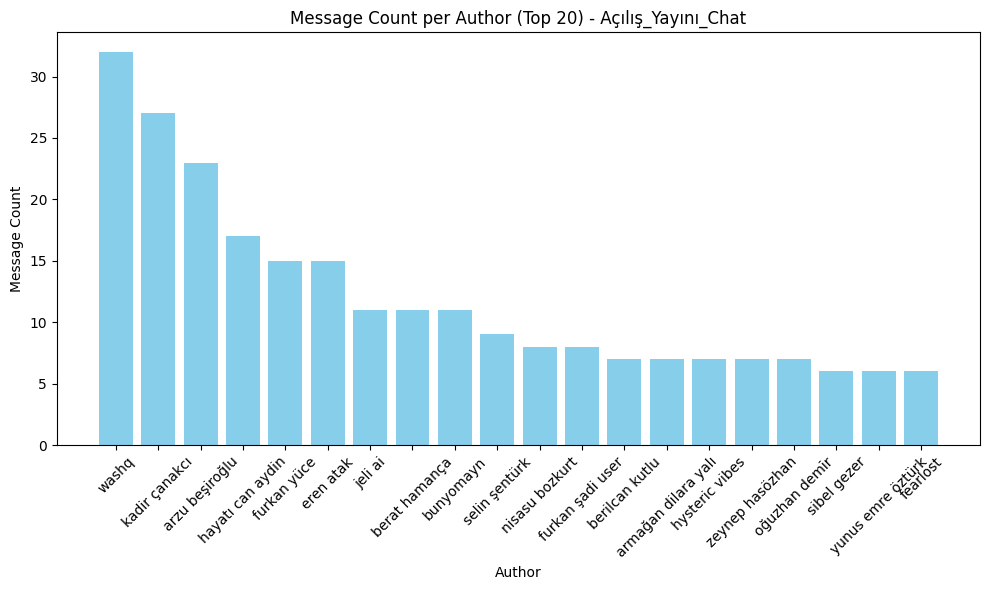

Saved plot to reports/images/Açılış_Yayını_Chat_message_frequency.png


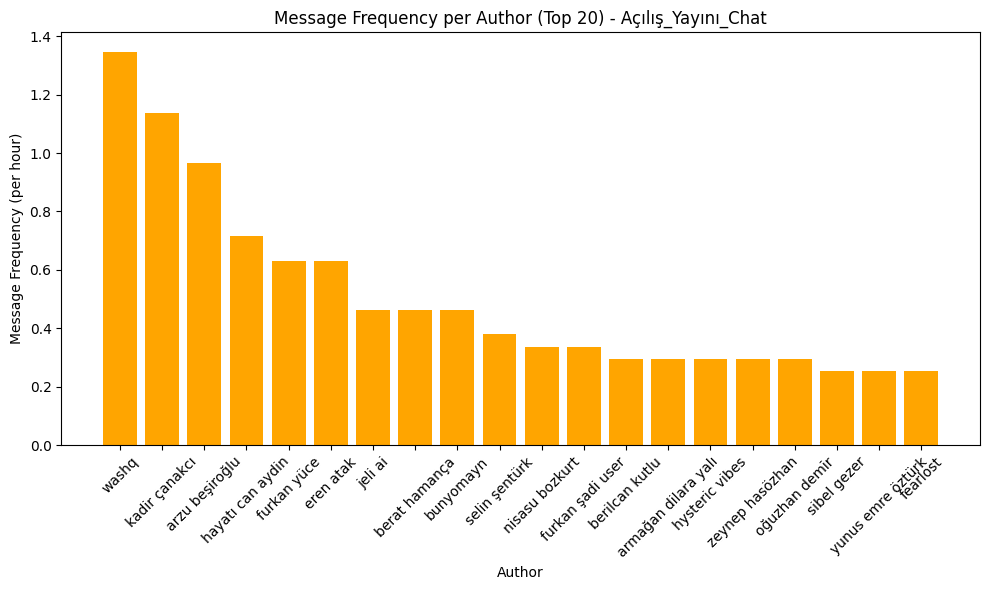

Saved plot to reports/images/Açılış_Yayını_Chat_message_length.png


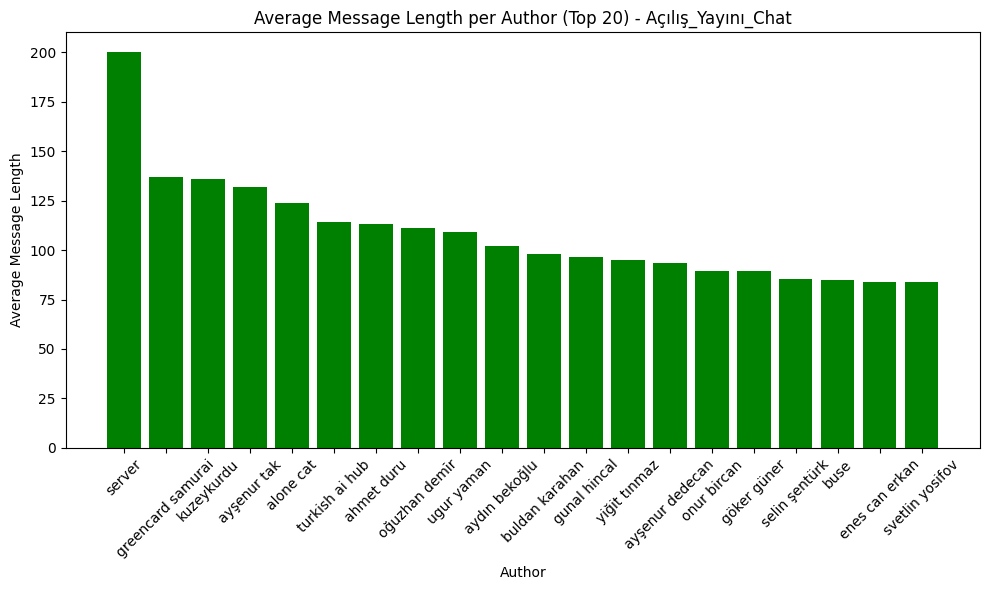

Saved plot to reports/images/Açılış_Yayını_Chat_time_patterns.png


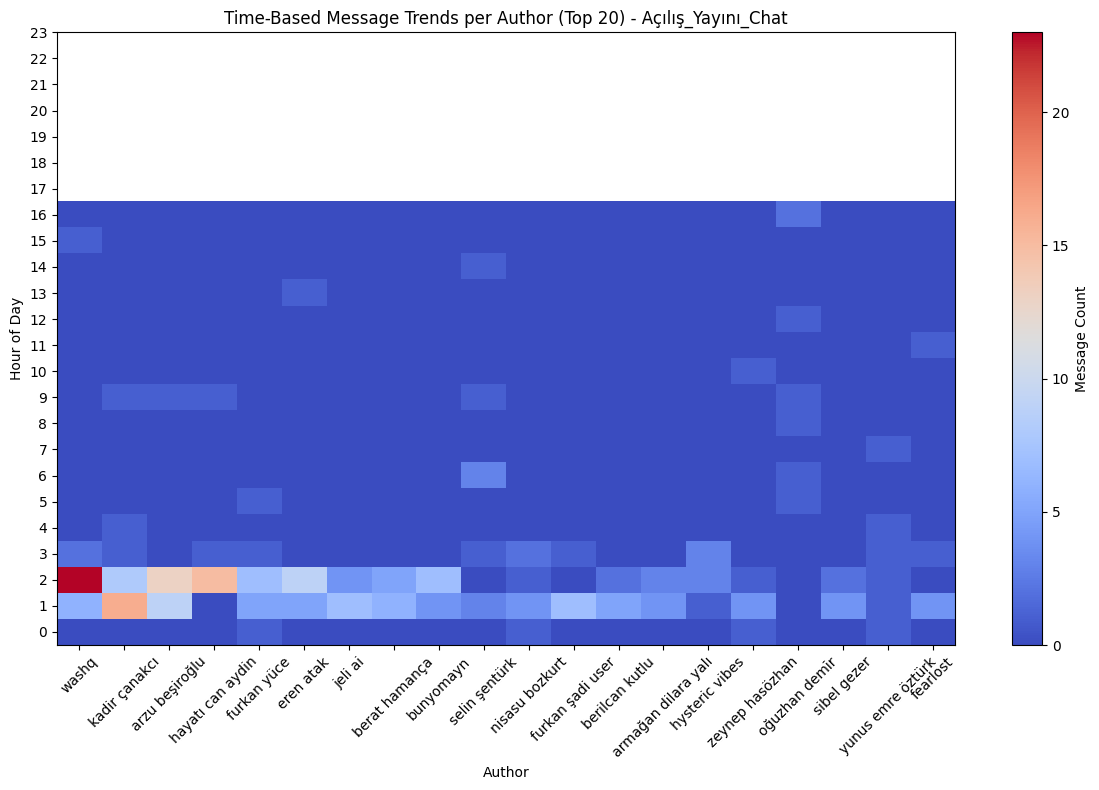

Saved plot to reports/images/Proje_Yayını_Chat_message_count.png


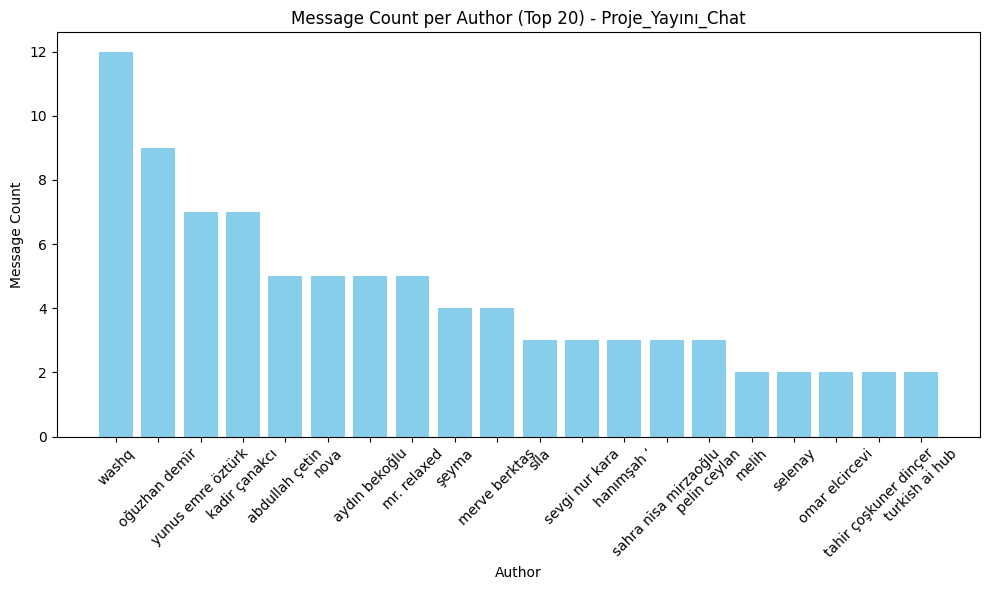

Saved plot to reports/images/Proje_Yayını_Chat_message_frequency.png


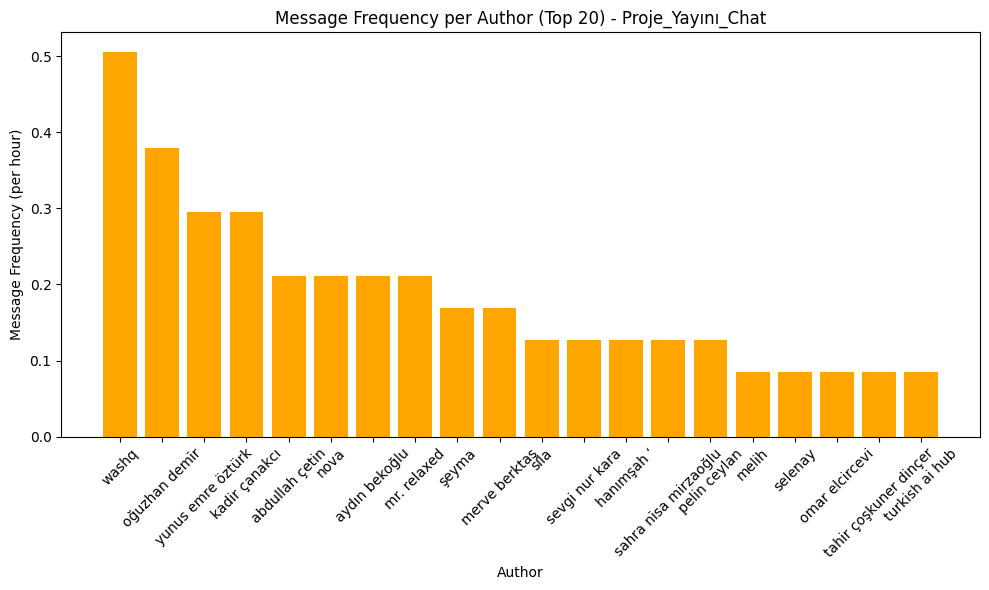

Saved plot to reports/images/Proje_Yayını_Chat_message_length.png


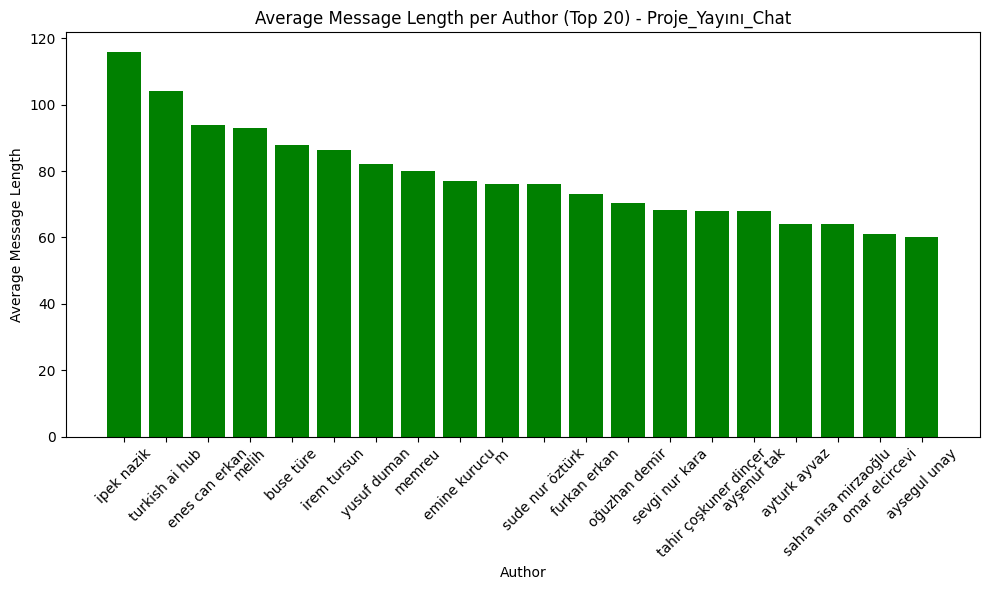

Saved plot to reports/images/Proje_Yayını_Chat_time_patterns.png


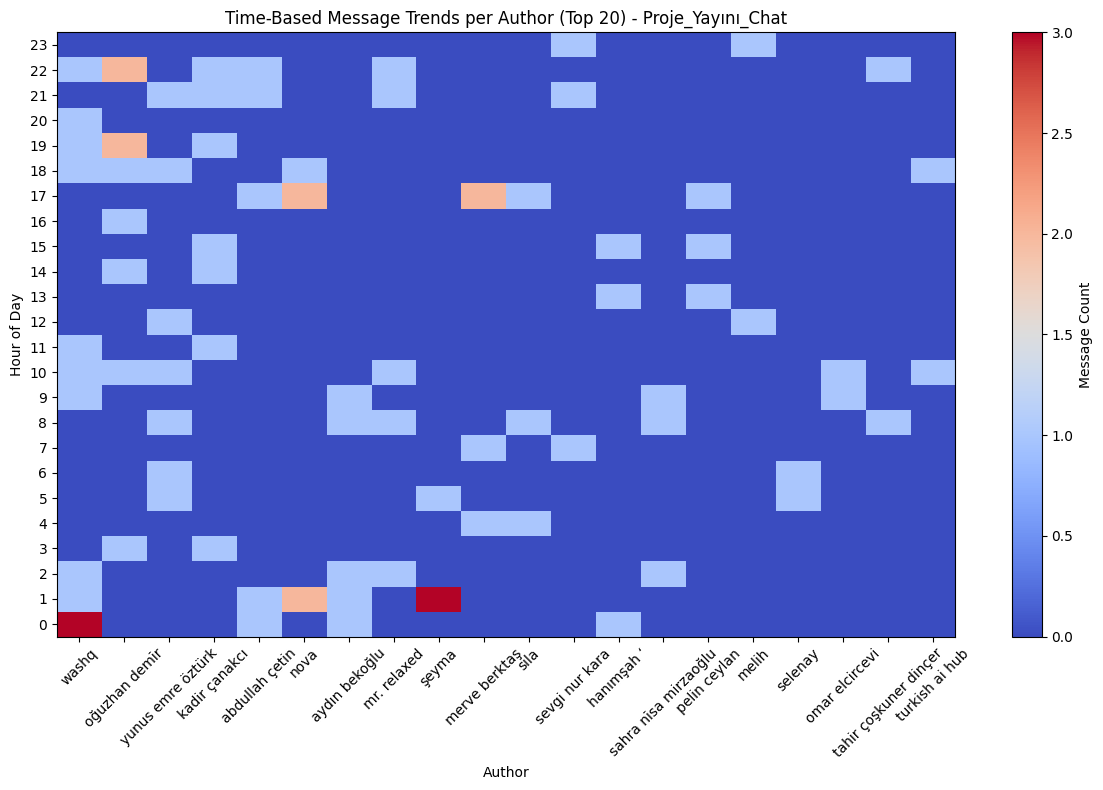

Saved plot to reports/images/Eğitim_1_Yayını_Chat_message_count.png


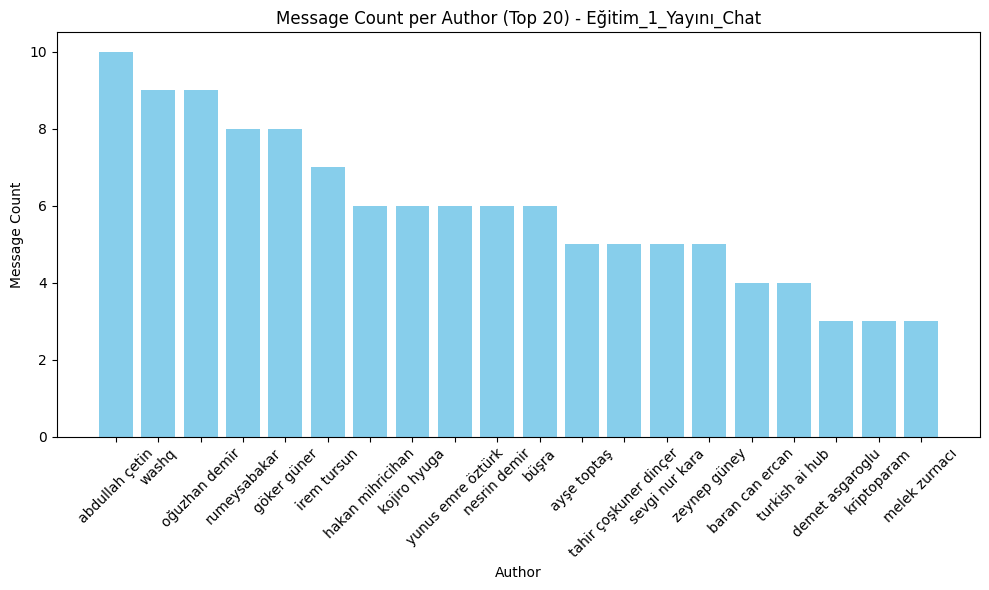

Saved plot to reports/images/Eğitim_1_Yayını_Chat_message_frequency.png


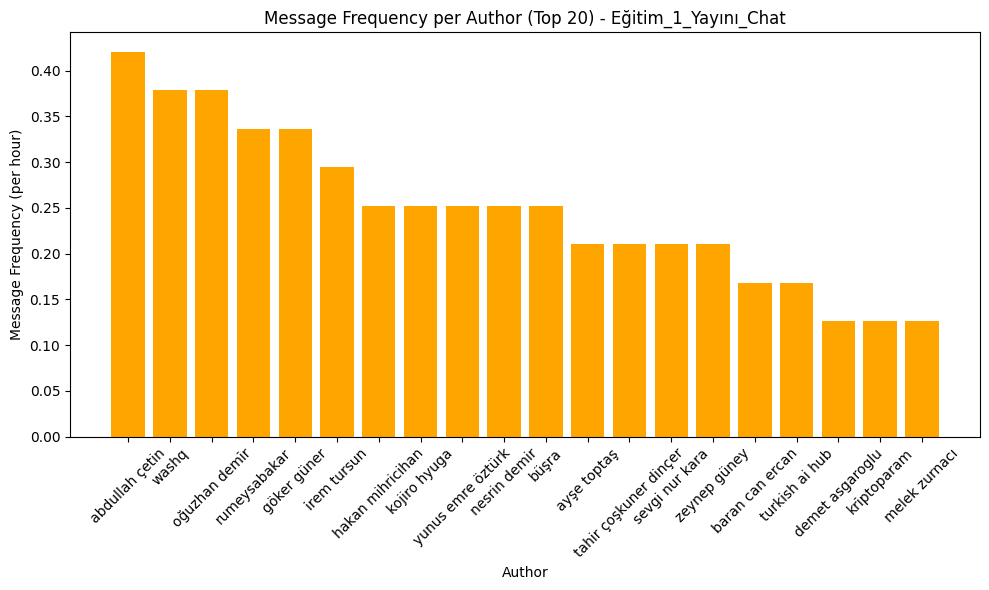

Saved plot to reports/images/Eğitim_1_Yayını_Chat_message_length.png


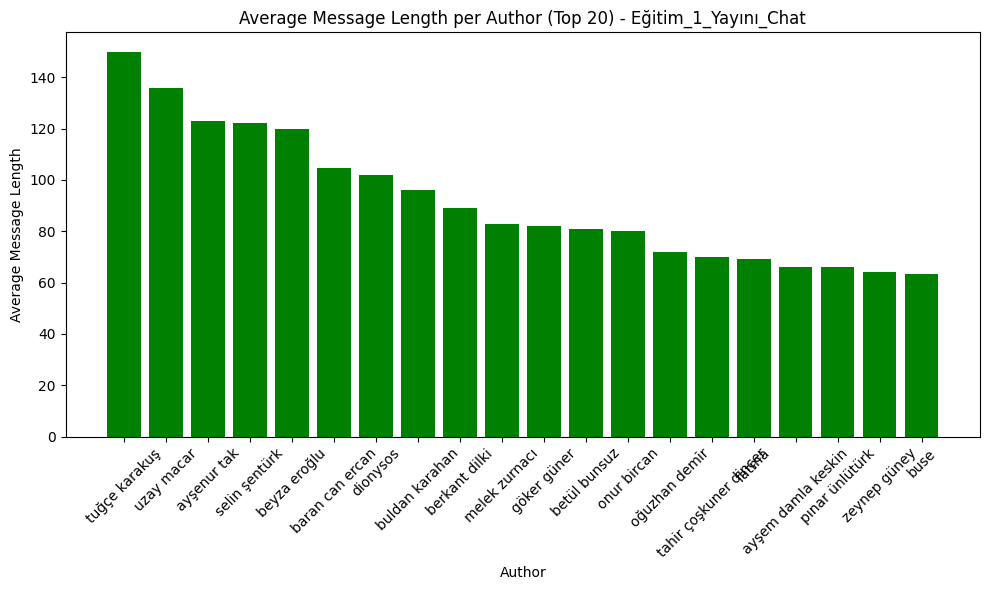

Saved plot to reports/images/Eğitim_1_Yayını_Chat_time_patterns.png


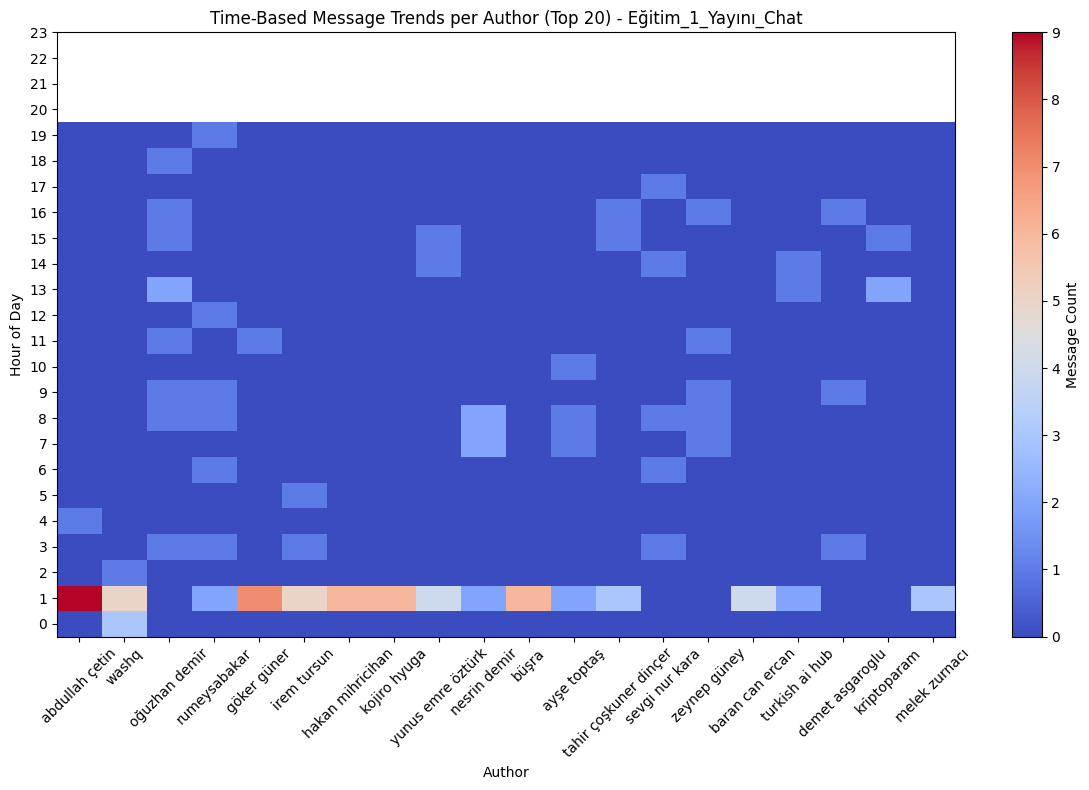

/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/237362837.py:33: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/237362837.py:38: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  plt.savefig(plot_path, bbox_inches='tight', dpi=300)


Saved plot to reports/images/Eğitim_2_Yayını_Chat_message_count.png


/Users/ugurcanuzunkaya/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


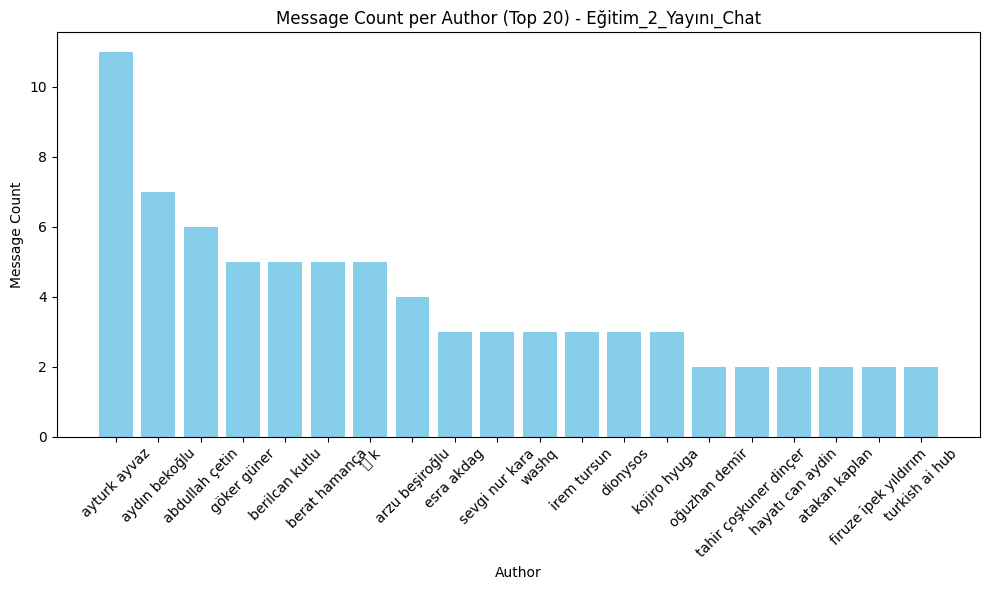

/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/237362837.py:53: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/237362837.py:58: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  plt.savefig(plot_path, bbox_inches='tight', dpi=300)


Saved plot to reports/images/Eğitim_2_Yayını_Chat_message_frequency.png


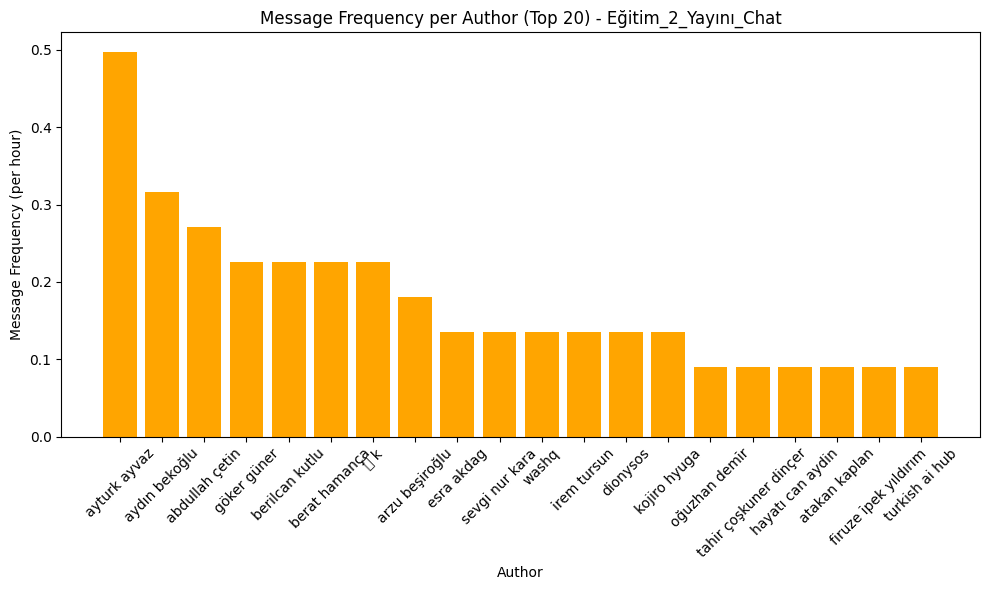

Saved plot to reports/images/Eğitim_2_Yayını_Chat_message_length.png


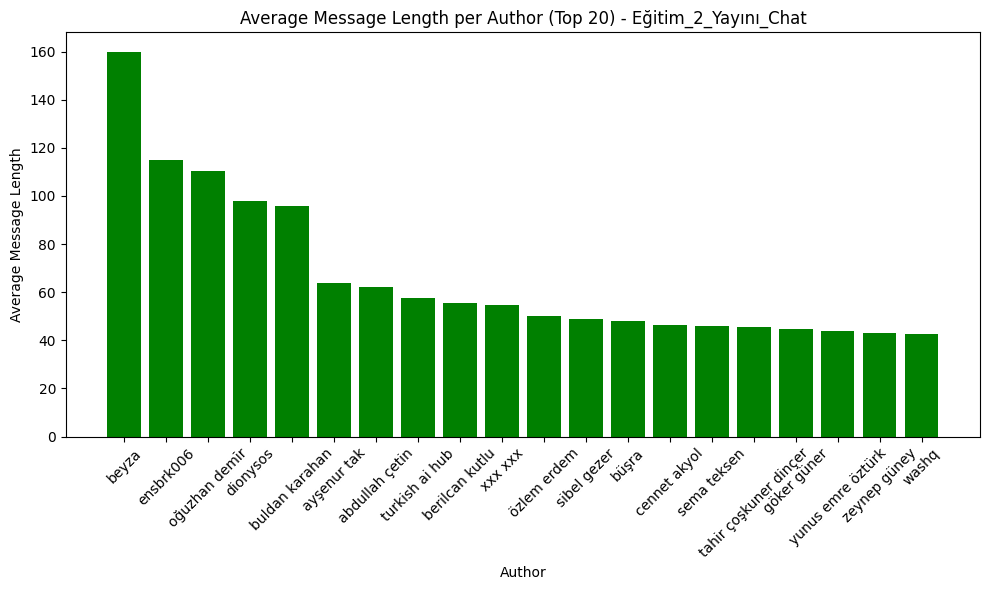

/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/237362837.py:125: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/d5/q872yxxd2z7c5l_6c2n_wpy40000gn/T/ipykernel_29159/237362837.py:130: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  plt.savefig(plot_path, bbox_inches='tight', dpi=300)


Saved plot to reports/images/Eğitim_2_Yayını_Chat_time_patterns.png


/Users/ugurcanuzunkaya/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


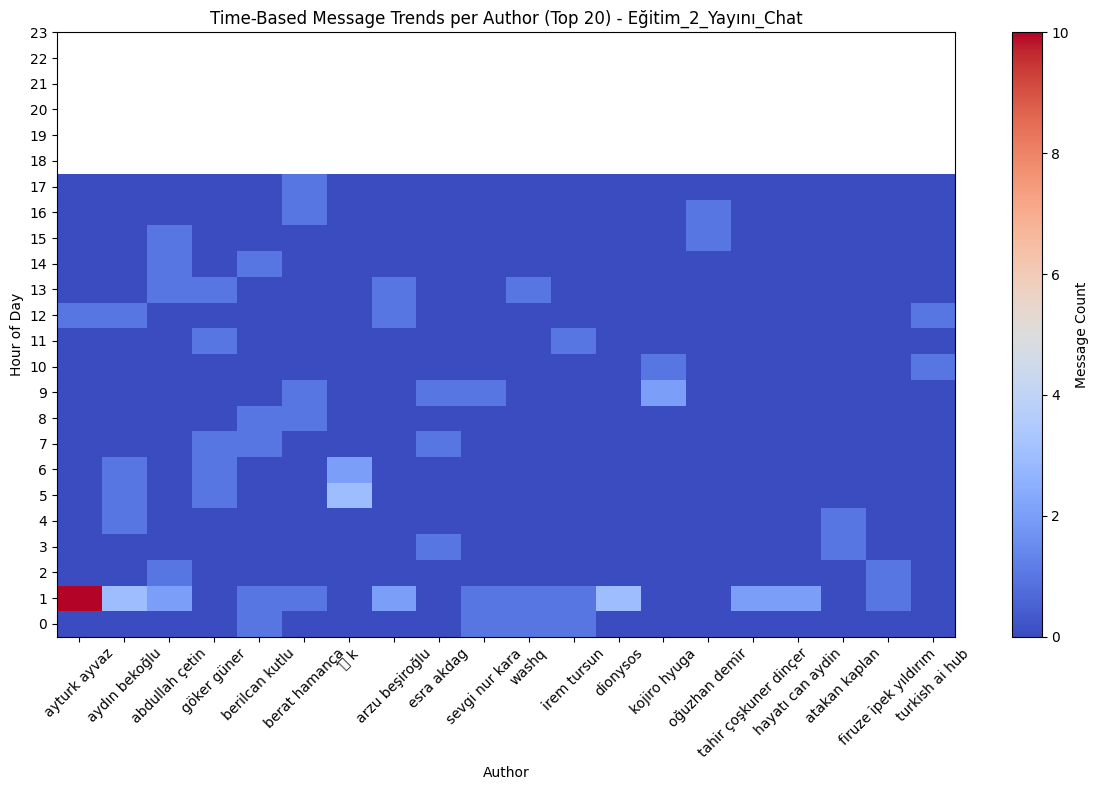

Saved plot to reports/images/All_Files_Combined_message_count.png


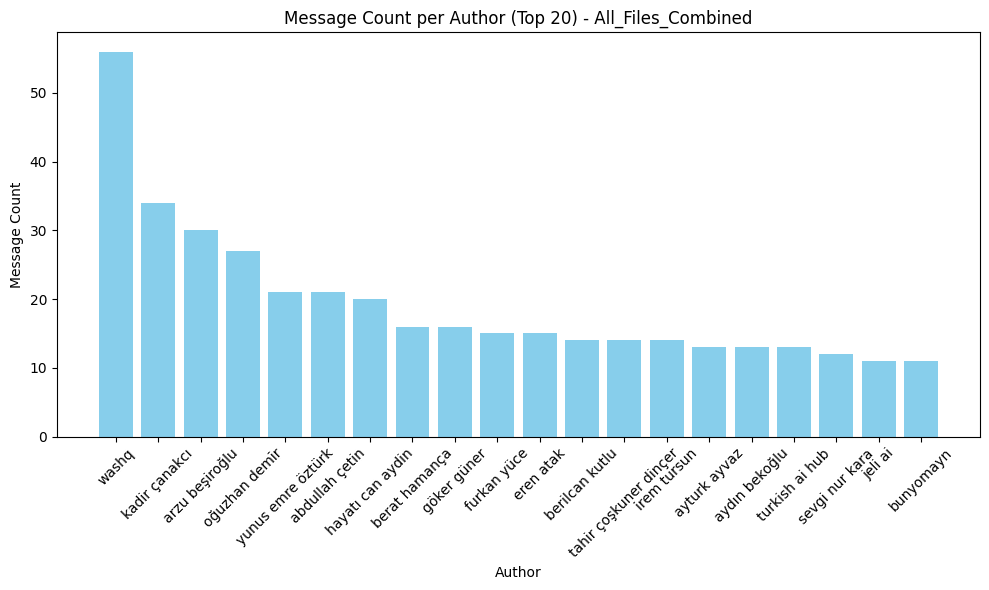

Saved plot to reports/images/All_Files_Combined_message_frequency.png


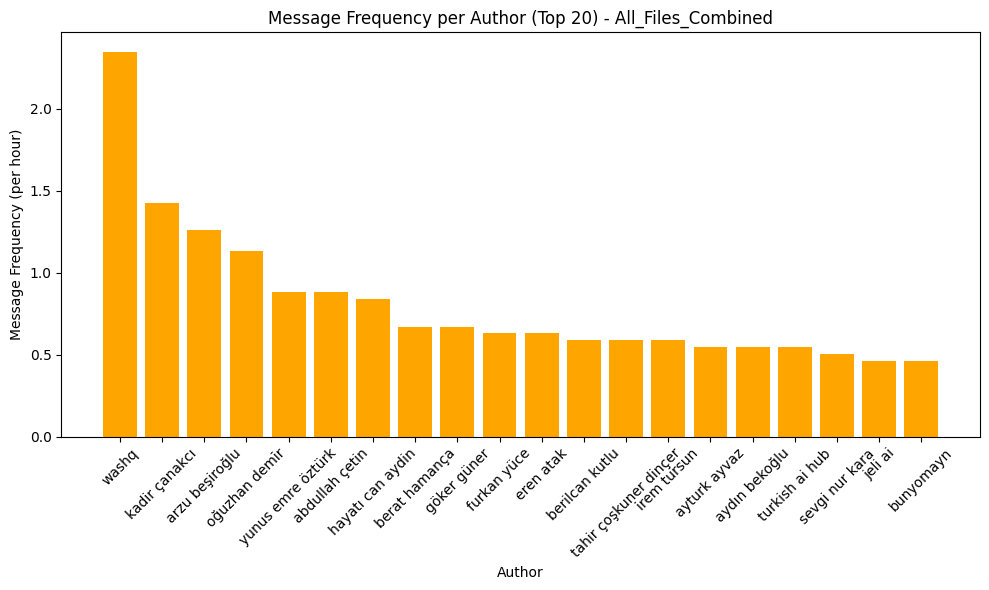

Saved plot to reports/images/All_Files_Combined_message_length.png


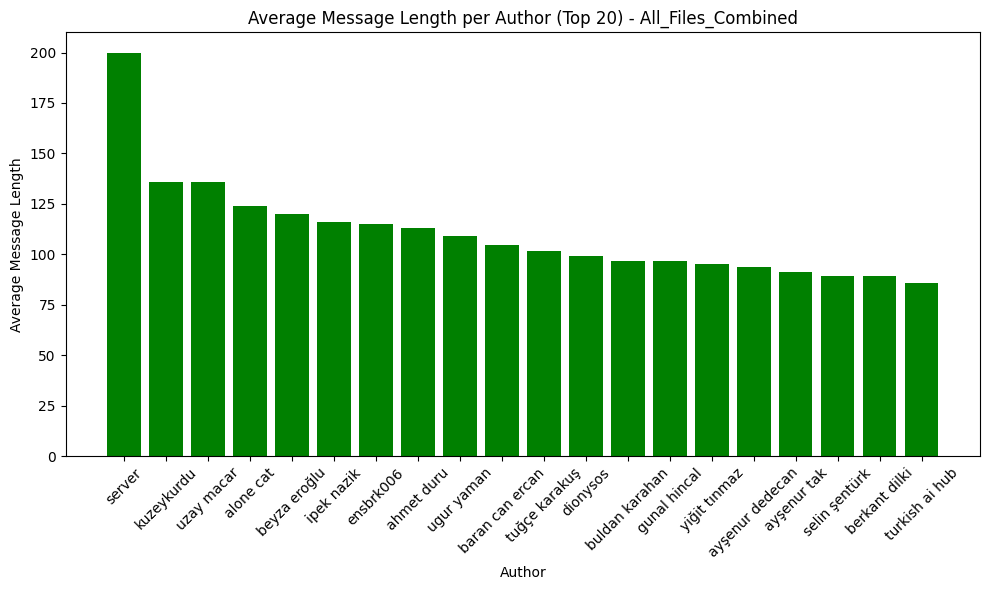

Saved plot to reports/images/All_Files_Combined_time_patterns.png


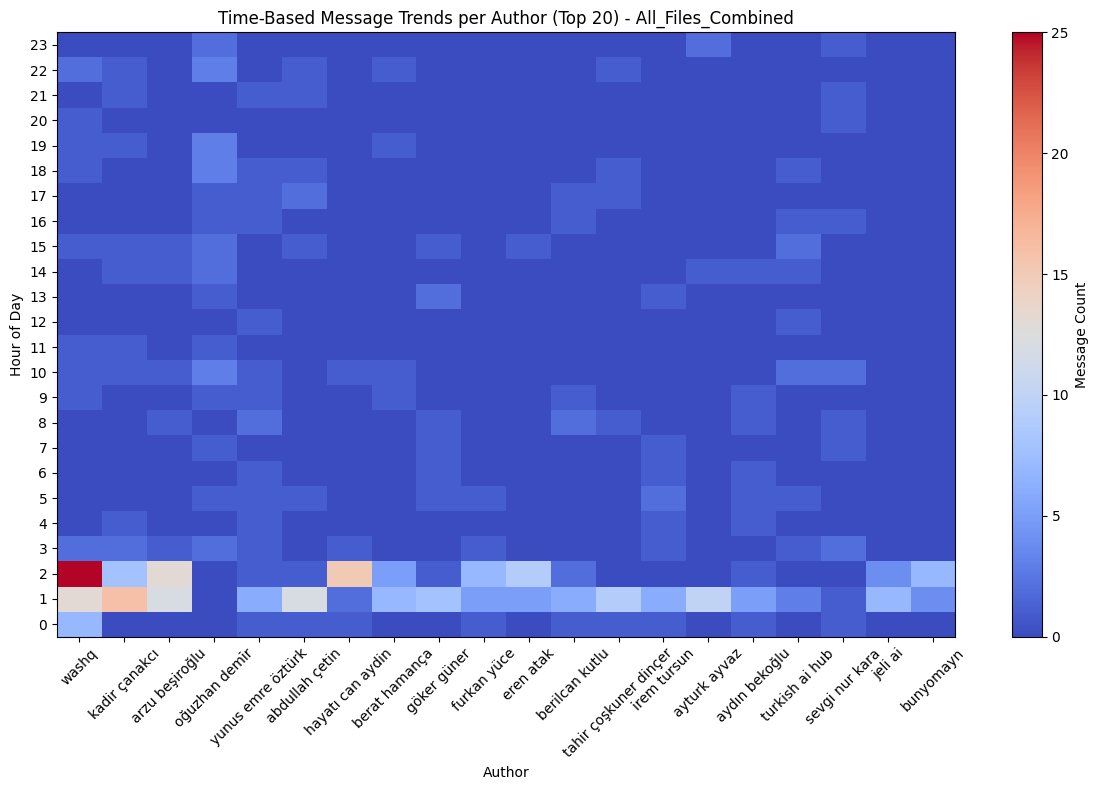

In [9]:
# Function to visualize author activity patterns
def visualize_author_activity(message_count_df, message_frequency_df, avg_message_length_df, file_name=None, save_path=None):
    """
    Create visualizations for author activity patterns.

    Args:
        message_count_df (DataFrame): DataFrame containing message counts per author.
        message_frequency_df (DataFrame): DataFrame containing message frequency per author.
        avg_message_length_df (DataFrame): DataFrame containing average message length per author.
        file_name (str, optional): Name of the file being visualized. Defaults to None.
        save_path (str, optional): Directory path to save the plots. Defaults to None.

    Returns:
        None
    """
    title_suffix = f" - {file_name}" if file_name else ""
    file_prefix = f"{file_name}_" if file_name else ""
    
    # Create save directory if specified and doesn't exist
    if save_path and not os.path.exists(save_path):
        os.makedirs(save_path)
    
    # Sort data in descending order for message counts and take top 20
    message_count_df = message_count_df.sort_values('Message Count', ascending=False).head(20)
    
    # Bar chart for message counts
    plt.figure(figsize=(10, 6))
    plt.bar(message_count_df['Author'], message_count_df['Message Count'], color='skyblue')
    plt.title(f'Message Count per Author (Top 20){title_suffix}')
    plt.xlabel('Author')
    plt.ylabel('Message Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot if save_path is provided
    if save_path:
        plot_path = os.path.join(save_path, f"{file_prefix}message_count.png")
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        print(f"Saved plot to {plot_path}")
    
    plt.show()

    # Sort data in descending order for message frequency and take top 20
    message_frequency_df = message_frequency_df.sort_values('Message Frequency (per hour)', ascending=False).head(20)
    
    # Bar chart for message frequency
    plt.figure(figsize=(10, 6))
    plt.bar(message_frequency_df['Author'], message_frequency_df['Message Frequency (per hour)'], color='orange')
    plt.title(f'Message Frequency per Author (Top 20){title_suffix}')
    plt.xlabel('Author')
    plt.ylabel('Message Frequency (per hour)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot if save_path is provided
    if save_path:
        plot_path = os.path.join(save_path, f"{file_prefix}message_frequency.png")
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        print(f"Saved plot to {plot_path}")
    
    plt.show()

    # Sort data in descending order for average message length and take top 20
    avg_message_length_df = avg_message_length_df.sort_values('Average Message Length', ascending=False).head(20)
    
    # Bar chart for average message length
    plt.figure(figsize=(10, 6))
    plt.bar(avg_message_length_df['Author'], avg_message_length_df['Average Message Length'], color='green')
    plt.title(f'Average Message Length per Author (Top 20){title_suffix}')
    plt.xlabel('Author')
    plt.ylabel('Average Message Length')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot if save_path is provided
    if save_path:
        plot_path = os.path.join(save_path, f"{file_prefix}message_length.png")
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        print(f"Saved plot to {plot_path}")
    
    plt.show()

# Function to visualize time-based trends
def visualize_time_patterns(time_patterns_df, file_name=None, save_path=None):
    """
    Create visualizations for time-based trends of messages.

    Args:
        time_patterns_df (DataFrame): DataFrame containing time patterns of messages per author.
        file_name (str, optional): Name of the file being visualized. Defaults to None.
        save_path (str, optional): Directory path to save the plots. Defaults to None.

    Returns:
        None
    """
    title_suffix = f" - {file_name}" if file_name else ""
    file_prefix = f"{file_name}_" if file_name else ""
    
    # Create save directory if specified and doesn't exist
    if save_path and not os.path.exists(save_path):
        os.makedirs(save_path)
    
    # Get top 20 authors by total message count
    author_totals = time_patterns_df.groupby('Author')['Message Count'].sum().sort_values(ascending=False)
    top_authors = author_totals.head(20).index
    
    # Filter time_patterns_df to include only top 20 authors
    filtered_df = time_patterns_df[time_patterns_df['Author'].isin(top_authors)]
    
    # Pivot the data for heatmap visualization with sorted authors
    pivot_table = filtered_df.pivot(index='Hour', columns='Author', values='Message Count').fillna(0)
    # Ensure columns are in the order of top authors
    pivot_columns = [col for col in top_authors if col in pivot_table.columns]
    pivot_table = pivot_table[pivot_columns]

    # Heatmap for time-based trends
    plt.figure(figsize=(12, 8))
    plt.imshow(pivot_table, aspect='auto', cmap='coolwarm', origin='lower')
    plt.colorbar(label='Message Count')
    plt.title(f'Time-Based Message Trends per Author (Top 20){title_suffix}')
    plt.xlabel('Author')
    plt.ylabel('Hour of Day')
    plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45)
    plt.yticks(ticks=range(24), labels=range(24))
    plt.tight_layout()
    
    # Save the plot if save_path is provided
    if save_path:
        plot_path = os.path.join(save_path, f"{file_prefix}time_patterns.png")
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        print(f"Saved plot to {plot_path}")
    
    plt.show()

# Define the image output directory
images_output_directory = "reports/images/"

# Example usage of visualization functions
# Assuming `individual_analysis_results` is a dictionary of analysis results for individual files
for file_name, results in individual_analysis_results.items():
    # Extract just the file name without path or extension for display
    display_name = os.path.splitext(os.path.basename(file_name))[0]
    visualize_author_activity(
        results["Message Count"], 
        results["Message Frequency"], 
        results["Average Message Length"], 
        display_name,
        images_output_directory
    )
    visualize_time_patterns(results["Time Patterns"], display_name, images_output_directory)

# Assuming `overall_analysis_results` is a dictionary of overall analysis results
visualize_author_activity(
    overall_analysis_results["Overall Message Count"],
    overall_analysis_results["Overall Message Frequency"],
    overall_analysis_results["Overall Average Message Length"],
    "All_Files_Combined",
    images_output_directory
)
visualize_time_patterns(overall_analysis_results["Overall Time Patterns"], "All_Files_Combined", images_output_directory)

# Export Reports
Save all reports and visualizations to files for easy sharing and reference.

In [10]:
def export_reports(individual_analysis_results, overall_analysis_results, output_directory):
    """
    Save all reports and visualizations to files for easy sharing and reference.

    Args:
        individual_analysis_results (dict): Dictionary containing analysis results for each file.
        overall_analysis_results (dict): Dictionary containing overall analysis results.
        output_directory (str): Directory where the reports and visualizations will be saved.

    Returns:
        None
    """
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Export individual reports
    for file_name, results in individual_analysis_results.items():
        report_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_report.xlsx")
        with pd.ExcelWriter(report_path, engine='xlsxwriter') as writer:
            results["Message Count"].to_excel(writer, sheet_name="Message Count", index=False)
            results["Message Frequency"].to_excel(writer, sheet_name="Message Frequency", index=False)
            results["Average Message Length"].to_excel(writer, sheet_name="Average Message Length", index=False)
            results["Time Patterns"].to_excel(writer, sheet_name="Time Patterns", index=False)
        print(f"Individual report saved: {report_path}")

    # Export aggregate report
    aggregate_report_path = os.path.join(output_directory, "aggregate_report.xlsx")
    with pd.ExcelWriter(aggregate_report_path, engine='xlsxwriter') as writer:
        overall_analysis_results["Overall Message Count"].to_excel(writer, sheet_name="Message Count", index=False)
        overall_analysis_results["Overall Message Frequency"].to_excel(writer, sheet_name="Message Frequency", index=False)
        overall_analysis_results["Overall Average Message Length"].to_excel(writer, sheet_name="Average Message Length", index=False)
        overall_analysis_results["Overall Time Patterns"].to_excel(writer, sheet_name="Time Patterns", index=False)
    print(f"Aggregate report saved: {aggregate_report_path}")

    # Export total report
    total_report_path = os.path.join(output_directory, "total_report.xlsx")
    with pd.ExcelWriter(total_report_path, engine='xlsxwriter') as writer:
        for file_name, results in individual_analysis_results.items():
            sheet_prefix = os.path.splitext(file_name)[0][:20]
            results["Message Count"].to_excel(writer, sheet_name=f"{sheet_prefix}_MsgCount", index=False)
            results["Message Frequency"].to_excel(writer, sheet_name=f"{sheet_prefix}_MsgFreq", index=False)
            results["Average Message Length"].to_excel(writer, sheet_name=f"{sheet_prefix}_AvgLen", index=False)
            results["Time Patterns"].to_excel(writer, sheet_name=f"{sheet_prefix}_TimePat", index=False)

        overall_analysis_results["Overall Message Count"].to_excel(writer, sheet_name="Overall_MsgCount", index=False)
        overall_analysis_results["Overall Message Frequency"].to_excel(writer, sheet_name="Overall_MsgFreq", index=False)
        overall_analysis_results["Overall Average Message Length"].to_excel(writer, sheet_name="Overall_AvgLen", index=False)
        overall_analysis_results["Overall Time Patterns"].to_excel(writer, sheet_name="Overall_TimePat", index=False)
    print(f"Total report saved: {total_report_path}")

    # Save visualizations
    for file_name, results in individual_analysis_results.items():
        # Visualize individual file data
        plt.figure()
        visualize_author_activity(results["Message Count"], results["Message Frequency"], results["Average Message Length"])
        plt.savefig(os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_activity.png"))
        plt.close()

        plt.figure()
        visualize_time_patterns(results["Time Patterns"])
        plt.savefig(os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_time_patterns.png"))
        plt.close()

    # Visualize overall data
    plt.figure()
    visualize_author_activity(overall_analysis_results["Overall Message Count"],
                              overall_analysis_results["Overall Message Frequency"],
                              overall_analysis_results["Overall Average Message Length"])
    plt.savefig(os.path.join(output_directory, "overall_activity.png"))
    plt.close()

    plt.figure()
    visualize_time_patterns(overall_analysis_results["Overall Time Patterns"])
    plt.savefig(os.path.join(output_directory, "overall_time_patterns.png"))
    plt.close()

    print(f"All reports and visualizations have been exported to {output_directory}")